In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import re

In [2]:
first_topic = 2
second_topic = 17
topic_labels = [
        'Agricultural Science',
        'Energy Science',
        'Information Systems',
        'Chemistry',
        'Aerodynamics',
        'Cell Research',
        'Research Programmes',
        'Material Science',
        'Astrophysics',
        'European Development',
        'Social Science',
        'Health Science',
        'Genetic Research',
        'Electronics and Photonics',
        'Neuroscience',
        'Quantum Physics',
        'Molecular Biology',
        'Energy Innovations',
        'Software Engineering',
        'Climate Science',
    ]

In [3]:
df = pd.read_csv("../output/topics/all_topics.csv", sep=";", decimal=",")

In [4]:
df["hotness"] = df["dif_e5"]/(df["load"]*100000)

In [5]:
def remove_project_suffix(text):
    return re.sub("_projects", "", text).upper()

df["fp"] = df["time"].apply(lambda text: remove_project_suffix(text))

## 1. Evaluation of living

In [7]:
word = "living"
topics = [3, 11, 16]
line_styles = ["-", "--", ":"]

In [10]:
def plot_word_prob_in_topics(axs, df, topic, word, line_style):
    
    # Get subset of data
    df_sub = df[(df.topic == topic) & (df.word == word)]
    
    # Word prob
    df_sub.plot("fp", "load", linestyle=line_style, color="black", ax=axs[0], label=f"Topic {topic}")
    
    # Rel word prob dif
    df_sub.plot(x="fp", y="hotness", linestyle=line_style, color="black", ax=axs[1], label=f"Topic {topic}")

[Text(0, 0.5, 'Relative word probability difference'),
 Text(0.5, 0, 'Framework programme'),
 Text(0.5, 1.0, "Relative probability difference of 'living' in top 3 topics")]

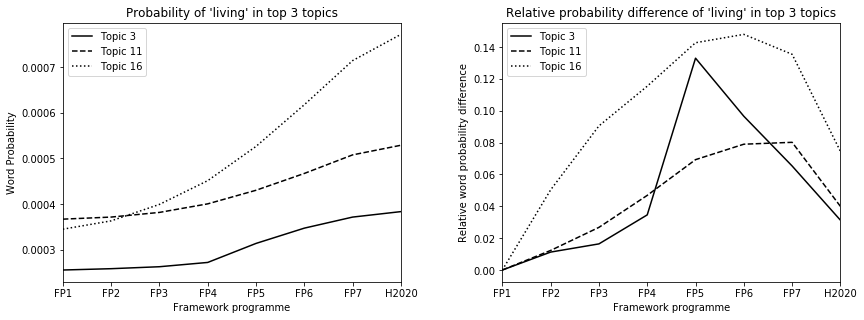

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

for i in range(len(topics)):
    topic = topics[i]
    line_style = line_styles[i]
    
    plot_word_prob_in_topics(axs, df, topic, word, line_style)

# Set title and labels
title = f"Probability of '{word}' in top 3 topics"
axs[0].set(title=title, xlabel="Framework programme", ylabel="Word Probability")
# axs[0].get_legend().remove()

# Set title and labels
title = f"Relative probability difference of '{word}' in top 3 topics"
axs[1].set(title=title, xlabel="Framework programme", ylabel="Relative word probability difference")
# axs[1].get_legend().remove()

## 2. Evaluation of control

In [12]:
word = "control"
topics = [15]
line_styles = ["-", "--", ":"]

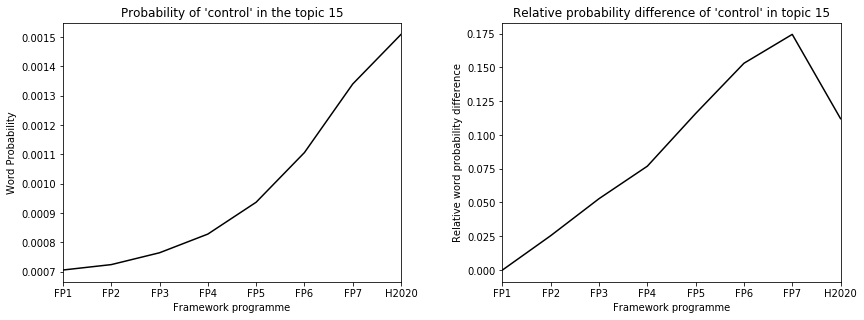

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

for i in range(len(topics)):
    topic = topics[i]
    line_style = line_styles[i]
    
    plot_word_prob_in_topics(axs, df, topic, word, line_style)

# Set title and labels
title = f"Probability of '{word}' in the topic 15"
axs[0].set(title=title, xlabel="Framework programme", ylabel="Word Probability")
axs[0].get_legend().remove()

# Set title and labels
title = f"Relative probability difference of '{word}' in topic 15"
axs[1].set(title=title, xlabel="Framework programme", ylabel="Relative word probability difference")
axs[1].get_legend().remove()